In [3]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import cmap
import cartopy.feature as cFeature

## Load downscaled data

In [ ]:
# Define dataset specifics

model_scenario_name = 'MRI-ESM2-0_ssp245' # Choose a model and SSP scenario
area_name = 'europe' # Choose an area
data_folder = '../NASA_data/' # Folder where downloaded downscaled CMIP6 data is stored


# Defines start and end of time slice by picking 20 years before and 20 years after abrupt SPG cooling
if model_scenario_name == 'NorESM2-LM_ssp126':
    start_time = '2015-01-01'; end_time = '2055-01-01'
    cooling_year = '2035-01-01'
    time_array = np.arange(2015, 2055, 1)
elif model_scenario_name == 'CESM2-WACCM_ssp126':
    start_time = '2020-01-01'; end_time = '2060-01-01'
    cooling_year = '2040-01-01'
    time_array = np.arange(2020, 2060, 1)
elif model_scenario_name == 'MRI-ESM2-0_ssp245':
    start_time = '2020-01-01'; end_time = '2060-01-01'
    cooling_year = '2040-01-01'
    time_array = np.arange(2020, 2060, 1)
else:
    print("This dataset is not considered in the current study, but can be added to the analysis")

if area_name == 'norway':
    southern_lat = 57; northern_lat = 72
    western_lon = 2.5; eastern_lon = 33
elif area_name == 'germany':
    southern_lat = 46.5; northern_lat = 55.5
    western_lon = 5; eastern_lon = 15
elif area_name == 'europe':
    southern_lat = 37; northern_lat = 72
    western_lon = 310; eastern_lon = 33        
elif area_name == 'global':
    southern_lat = -90; northern_lat = 90
    western_lon = 0; eastern_lon = 360
else:
    print("This area is not predefined in the current study, but can be added to the analysis")

# Load mean daily temperature data

files = glob.glob(data_folder+'tas_day_'+model_scenario_name+'*')
files.sort()
tas = xr.open_mfdataset(files)
tas

if area_name == 'europe':
    temp1 = tas.tas.sel(lat=slice(southern_lat, northern_lat), 
                        lon=slice(western_lon, 360), 
                        time=slice(start_time, end_time))
    temp2 = tas.tas.sel(lat=slice(southern_lat, northern_lat), 
                        lon=slice(0, eastern_lon), 
                        time=slice(start_time, end_time))

    temp = xr.concat([temp1, temp2], dim='lon')
else:
    temp = tas.tas.sel(lat=slice(southern_lat, northern_lat), 
                        lon=slice(western_lon, eastern_lon), 
                        time=slice(start_time, end_time))
temp.load()

<xarray.DataArray 'tas' (time: 14611, lat: 140, lon: 332)> Size: 3GB
array([[[      nan,       nan,       nan, ..., 268.31244, 269.04495,
         269.1225 ],
        [      nan,       nan,       nan, ..., 268.8562 , 269.43903,
         269.61105],
        [      nan,       nan,       nan, ..., 268.81085, 269.13937,
         268.9663 ],
        ...,
        [248.84087, 248.78363, 248.95227, ...,       nan,       nan,
               nan],
        [247.44485, 247.52301, 247.68872, ...,       nan,       nan,
               nan],
        [247.38155, 247.06985, 246.9862 , ...,       nan,       nan,
               nan]],

       [[      nan,       nan,       nan, ..., 268.03113, 268.72723,
         268.8465 ],
        [      nan,       nan,       nan, ..., 268.30383, 268.87708,
         269.0681 ],
        [      nan,       nan,       nan, ..., 268.03595, 268.36786,
         268.21167],
...
        [254.30441, 254.31384, 254.5205 , ...,       nan,       nan,
               nan],
        [253.06424, 253.1925 , 253.40042, ...,       nan,       nan,
               nan],
        [253.15509, 252.87799, 252.84143, ...,       nan,       nan,
               nan]],

       [[      nan,       nan,       nan, ..., 277.78705, 278.52475,
         278.46103],
        [      nan,       nan,       nan, ..., 278.85468, 279.5395 ,
         279.4906 ],
        [      nan,       nan,       nan, ..., 279.22015, 279.71616,
         279.27466],
        ...,
        [256.33823, 256.2754 , 256.50385, ...,       nan,       nan,
               nan],
        [254.84076, 254.92256, 255.15341, ...,       nan,       nan,
               nan],
        [254.67601, 254.3772 , 254.36401, ...,       nan,       nan,
               nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 117kB 2020-01-01T12:00:00 ... 2060-01-01T1...
  * lat      (lat) float64 1kB 37.12 37.38 37.62 37.88 ... 71.38 71.62 71.88
  * lon      (lon) float64 3kB 310.1 310.4 310.6 310.9 ... 32.38 32.62 32.88
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: mean time: maximum
    original_name:  TA
    comment:        near-surface (usually, 2 meter) air temperature; derived ...
    units:          K
    long_name:      Daily Near-Surface Air Temperature
    standard_name:  air_temperature

## Visualize data

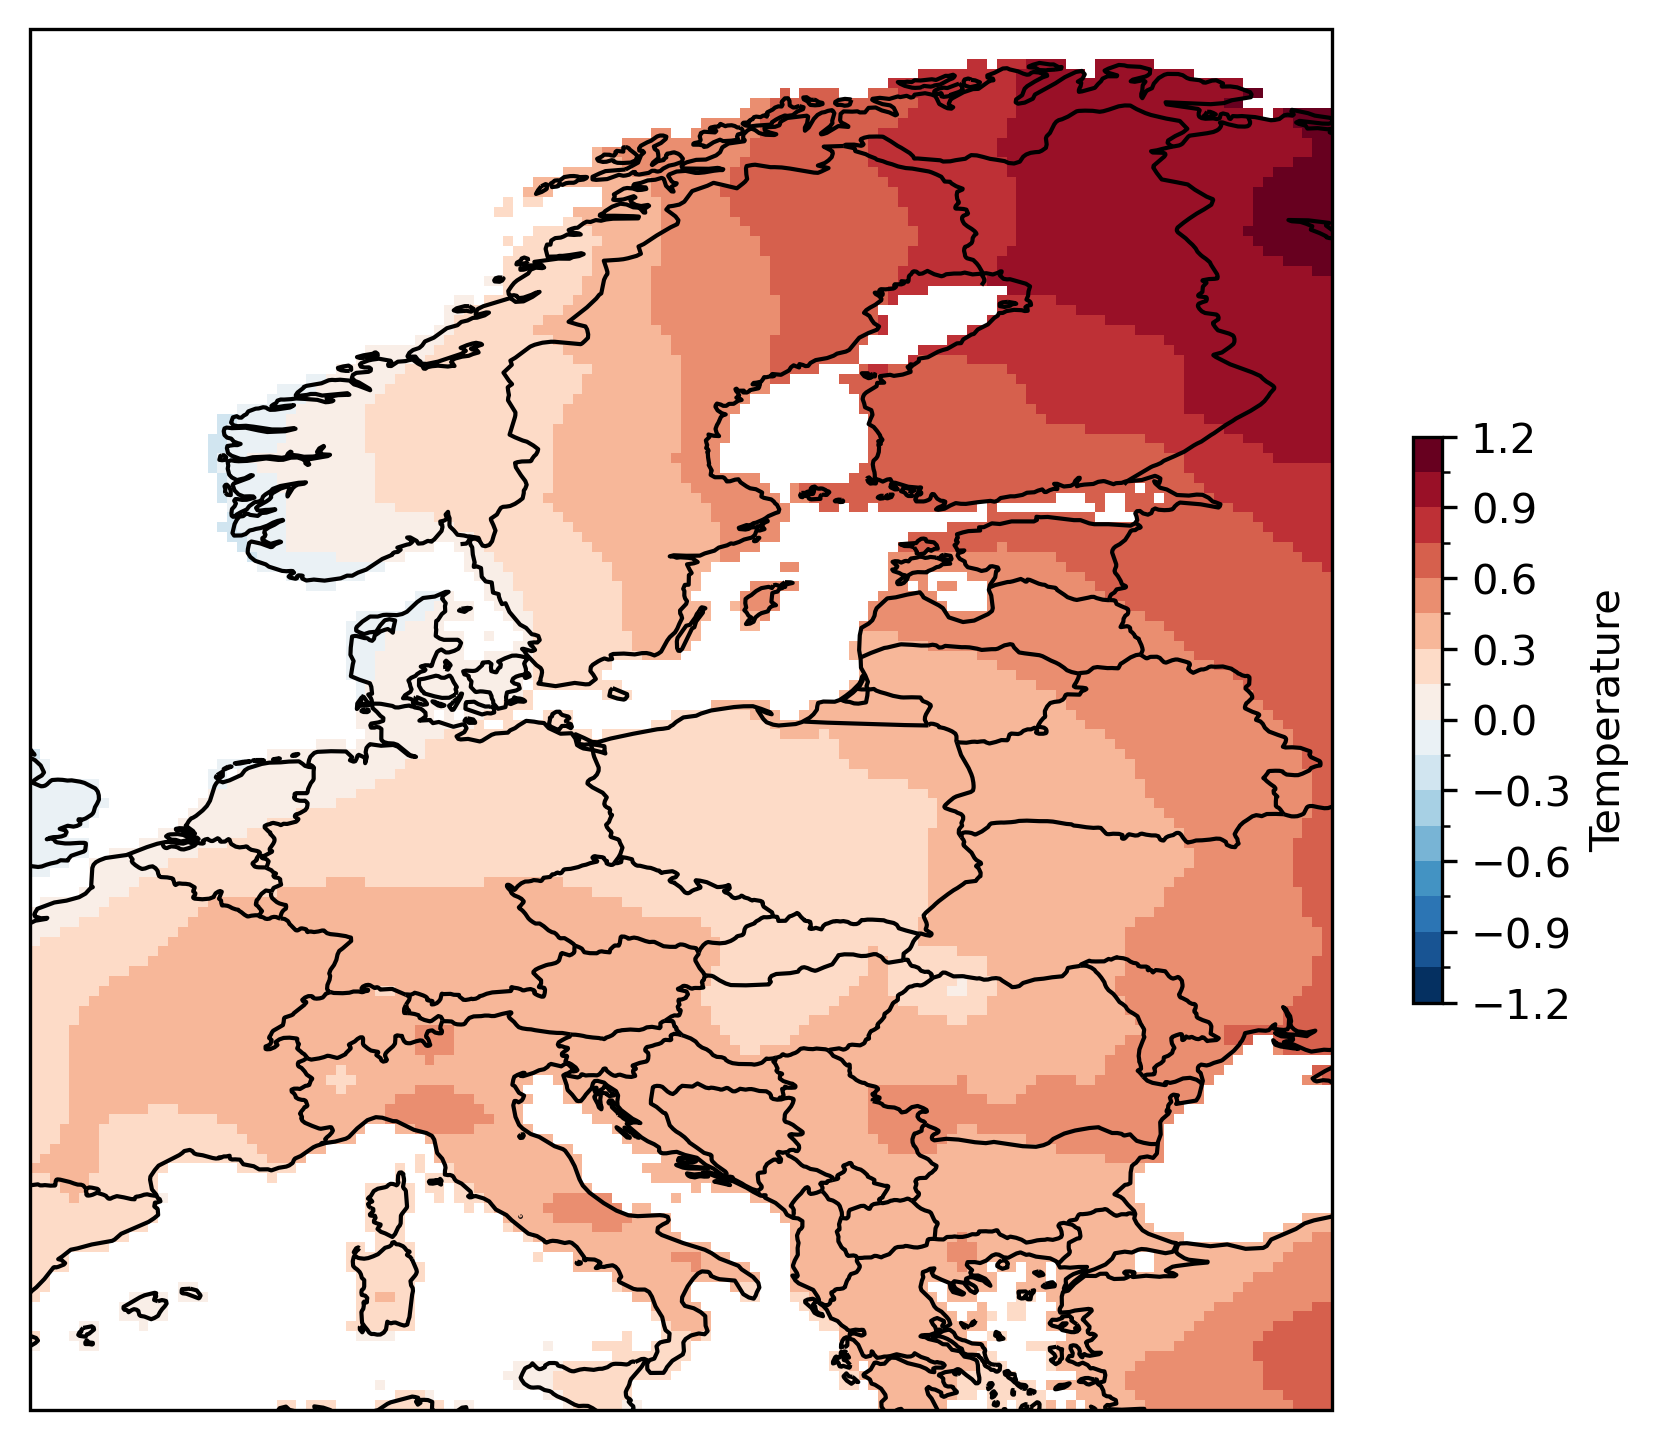

In [5]:
cooling_year = '2040-01-01'
# Plot difference map
fig = plt.figure(1, figsize=(7,7),dpi=300)
ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
data = temp.sel(time=slice(cooling_year, end_time)).mean('time') - temp.sel(time=slice(start_time, cooling_year)).mean('time')

map = data.plot(ax=ax, 
                transform=ccrs.PlateCarree(),levels=21, 
                cbar_kwargs={'orientation':'vertical','shrink':0.35, 'aspect':20,'label':'Temperature'})
ax.coastlines()
ax.add_feature(cFeature.BORDERS)
plt.show()

# Compute climatology differences for major cities

### Save timeseries of temperature and precipitation data for different time series

In [ ]:
# Define dataset specifics

model_scenario_name = 'MPI-ESM1-2-LR_ssp245' # Choose a model and SSP scenario
area_names = ['Oslo','Bergen', 'Trondheim', 'Tromsø'] # Choose an area
data_folder = '../NASA_data/' # Folder where downloaded downscaled CMIP6 data is stored
save_folder = '../city_data/' # Folder where climatologies should be saved
os.makedirs(save_folder, exist_ok=True) 


# Defines start and end of time slice by picking 20 years before and 20 years after abrupt SPG cooling
if model_scenario_name == 'MRI-ESM2-0_ssp245':
    start_time = '2015-01-01'; end_time = '2060-01-01'
    time_array = np.arange(2015, 2060, 1)

if model_scenario_name == 'MPI-ESM1-2-LR_ssp245':
    start_time = '2015-01-01'; end_time = '2060-01-01'
    time_array = np.arange(2015, 2060, 1)

elif model_scenario_name == 'NorESM2-LM_ssp245':
    start_time = '2015-01-01'; end_time = '2054-12-31'
    cooling_year = '2035-01-01'
    time_array = np.arange(2015, 2055, 1)
else:
    print("This dataset is not considered in the current study, but can be added to the analysis")

for area_name in area_names:
    if area_name == 'Berlin':
        lat = 52.5; lon = 13.4
    elif area_name == 'Oslo':
        lat = 59.9; lon = 10.7
    elif area_name == 'Dublin':
        lat = 53.3; lon = 353.7
    elif area_name == 'London':
        lat = 51.5; lon = 359.9
    elif area_name == 'Paris':
        lat = 48.8; lon = 2.3
    elif area_name == 'Copenhagen':
        lat = 55.7; lon = 12.5
    elif area_name == 'Bergen':
        lat = 60.4; lon = 5.4
    elif area_name == 'Trondheim':
        lat = 63.4; lon = 10.4
    elif area_name == 'Tromsø':
        lat = 69.7; lon = 18.9
    else:
        print("This area is not predefined in the current study, but can be added to the analysis")


    # Load mean daily temperature data

    files = glob.glob(data_folder+'tas_day_'+model_scenario_name+'*')
    files.sort()
    tas = xr.open_mfdataset(files)
    print('selecting temp')
    temp = tas.tas.sel(lat=lat, lon=lon, method='nearest').sel(time=slice(start_time, end_time))
    print('loading temp')
    temp.to_netcdf(save_folder+model_scenario_name+'_'+area_name+'_temp.nc')

    # Load mean daily precipitation data

    files = glob.glob(data_folder+'pr_day_'+model_scenario_name+'*')
    files.sort()
    pr = xr.open_mfdataset(files)
    print('selecting precip')

    precip = pr.sel(lat=lat, lon=lon, method='nearest').sel(time=slice(start_time, end_time))

    # Convert precipitation flux from kg/m2/s to daily amount --> mm/day
    print('converting precip')
    precip['pr'].values = precip.pr.values * 24*60*60
    precip = precip.pr

    precip.to_netcdf(save_folder+model_scenario_name+'_'+area_name+'_precip.nc')


selecting temp
loading temp
selecting precip
converting precip
selecting temp
loading temp
selecting precip
converting precip
selecting temp
loading temp
selecting precip
converting precip
selecting temp
loading temp
selecting precip
converting precip


## Plot climatology differences in major cities

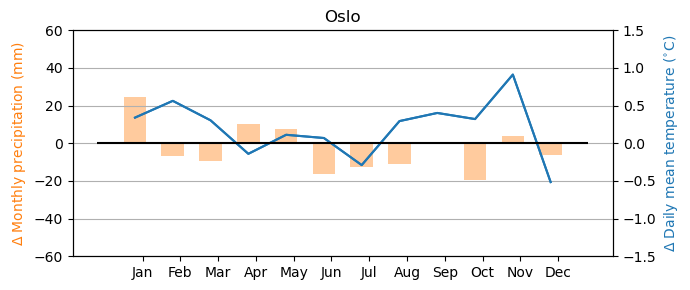

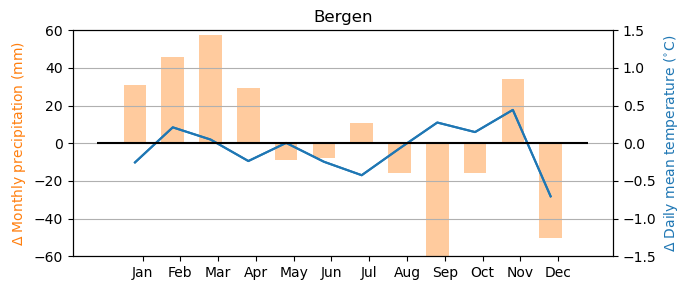

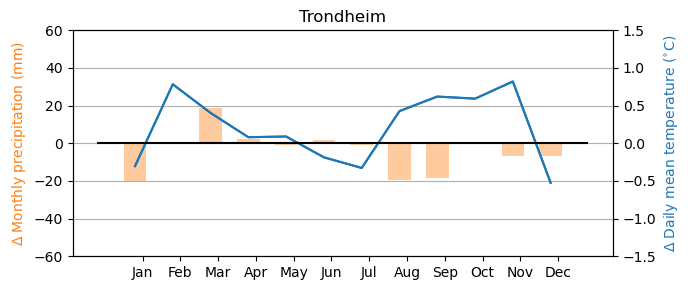

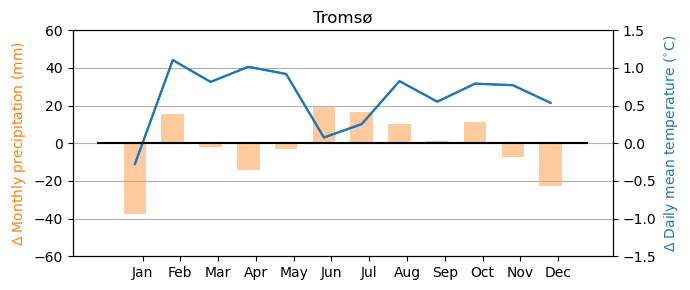

In [23]:
save_folder = '../figures/climatologies_diff/' # Folder where climatologies should be saved
os.makedirs(save_folder, exist_ok=True) 

model_scenario_name = 'MRI-ESM2-0_ssp245' # Choose a model and SSP scenario
area_names = ['Oslo', 'Bergen', 'Trondheim', 'Tromsø'] # Choose an area

# Defines start and end of time slice by picking 20 years before and 20 years after abrupt SPG cooling
start_time1 = '2020-01-01'; end_time1 = '2039-12-31'
start_time2 = '2040-01-01'; end_time2 = '2059-12-31'

for area_name in area_names:

    temp = xr.open_dataarray('../city_data/'+model_scenario_name+'_'+area_name+'_temp.nc')
    precip = xr.open_dataarray('../city_data/'+model_scenario_name+'_'+area_name+'_precip.nc')
    # Divide time period into pre- and post cooling

    temp_pre_cooling = temp.sel(time=slice(start_time1, end_time1))
    temp_post_cooling = temp.sel(time=slice(start_time2, end_time2))
    pr_pre_cooling = precip.sel(time=slice(start_time1, end_time1))
    pr_post_cooling = precip.sel(time=slice(start_time2, end_time2))

    # Create climatology for both periods
    temp_pre_clim = temp_pre_cooling.groupby('time.month').mean('time')
    temp_post_clim = temp_post_cooling.groupby('time.month').mean('time')
    pr_pre_clim = pr_pre_cooling.groupby('time.month').mean('time')
    pr_post_clim = pr_post_cooling.groupby('time.month').mean('time')

    # Plot
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    fig, ax1 = plt.subplots(figsize=[7, 3])
    ax2 = ax1.twinx()
    #ax1.bar(np.arange(1, 13, 1), pr_pre_clim, color='tab:red', alpha=0.4, width=0.4, label=str(time_array[0])+'-'str(time_array[0]+20))
    #ax1.bar(np.arange(1, 13, 1)+0.4, pr_post_clim, color='tab:blue', alpha=0.4, width = 0.4, label=str(time_array[0]+20)+'-'str(time_array[-1]))
    ax1.bar(np.arange(1, 13, 1), (pr_post_clim-pr_pre_clim)*30, alpha=0.4, width=0.6, color='tab:orange')
    ax1.set_ylabel('$\Delta$ Monthly precipitation (mm)', color='tab:orange')
    ax1.set_ylim([-60,60])
    #ax2.plot(np.arange(1, 13, 1)+0.2, temp_pre_clim-273.15, linestyle='--', color='tab:red')
    #ax2.plot(np.arange(1, 13, 1)+0.2, temp_post_clim-273.15, linestyle='-', color='tab:blue')
    ax2.plot(np.arange(1, 13, 1), temp_post_clim - temp_pre_clim, color='tab:blue')
    ax2.plot(np.arange(1, 13, 1), temp_post_clim - temp_pre_clim, color='tab:blue')
    ax2.set_ylabel(r'$\Delta$ Daily mean temperature ($^{\circ}$C)', color='tab:blue')
    ax2.set_ylim([-1.5,1.5])
    ax2.hlines(0, 0, 13, color='black')
    plt.xticks(ticks=np.arange(1, 13, 1)+0.2, labels=months)
    plt.grid(axis='both')
    plt.title(area_name)
    fig.tight_layout()
    fig.savefig(save_folder+model_scenario_name+'_'+area_name+'.png')

    plt.show()

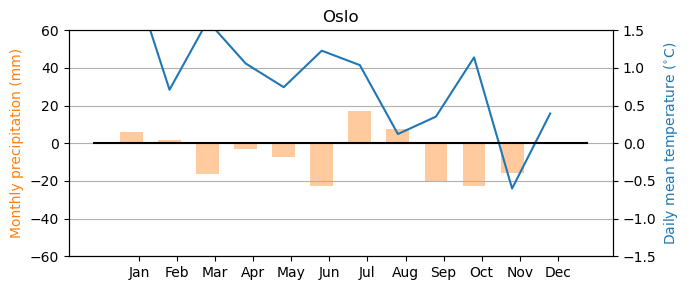

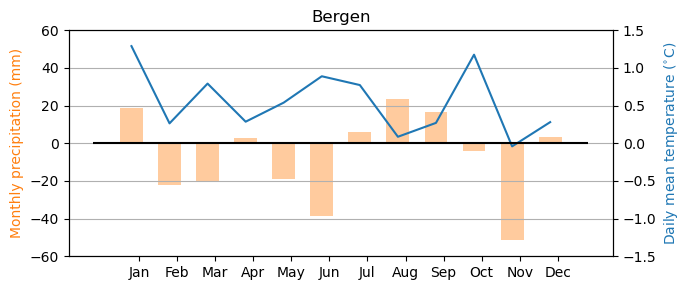

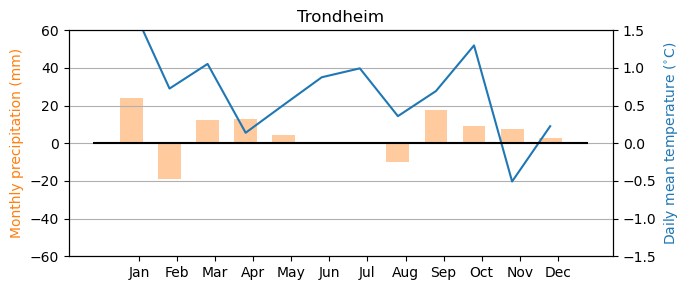

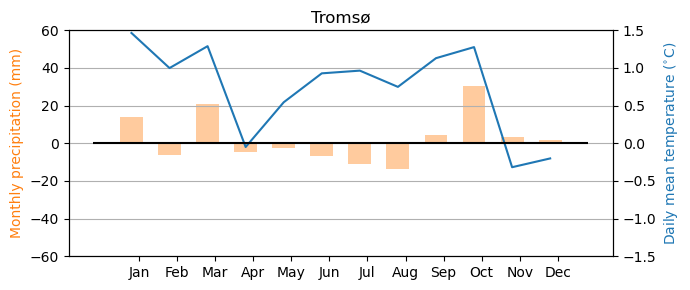

In [24]:
save_folder = '../figures/climatologies_diff/' # Folder where climatologies should be saved
os.makedirs(save_folder, exist_ok=True) 

model_scenario_name = 'MPI-ESM1-2-LR_ssp245' # Choose a model and SSP scenario
area_names = ['Oslo', 'Bergen', 'Trondheim', 'Tromsø'] # Choose an area

# Defines start and end of time slice by picking 20 years before and 20 years after abrupt SPG cooling
start_time1 = '2020-01-01'; end_time1 = '2039-12-31'
start_time2 = '2040-01-01'; end_time2 = '2059-12-31'

for area_name in area_names:

    temp = xr.open_dataarray('../city_data/'+model_scenario_name+'_'+area_name+'_temp.nc')
    precip = xr.open_dataarray('../city_data/'+model_scenario_name+'_'+area_name+'_precip.nc')
    # Divide time period into pre- and post cooling

    temp_pre_cooling = temp.sel(time=slice(start_time1, end_time1))
    temp_post_cooling = temp.sel(time=slice(start_time2, end_time2))
    pr_pre_cooling = precip.sel(time=slice(start_time1, end_time1))
    pr_post_cooling = precip.sel(time=slice(start_time2, end_time2))

    # Create climatology for both periods
    temp_pre_clim = temp_pre_cooling.groupby('time.month').mean('time')
    temp_post_clim = temp_post_cooling.groupby('time.month').mean('time')
    pr_pre_clim = pr_pre_cooling.groupby('time.month').mean('time')
    pr_post_clim = pr_post_cooling.groupby('time.month').mean('time')

    # Plot
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    fig, ax1 = plt.subplots(figsize=[7, 3])
    ax2 = ax1.twinx()
    #ax1.bar(np.arange(1, 13, 1), pr_pre_clim, color='tab:red', alpha=0.4, width=0.4, label=str(time_array[0])+'-'str(time_array[0]+20))
    #ax1.bar(np.arange(1, 13, 1)+0.4, pr_post_clim, color='tab:blue', alpha=0.4, width = 0.4, label=str(time_array[0]+20)+'-'str(time_array[-1]))
    ax1.bar(np.arange(1, 13, 1), (pr_post_clim-pr_pre_clim)*30, alpha=0.4, width=0.6, color='tab:orange')
    ax1.set_ylabel('Monthly precipitation (mm)', color='tab:orange')
    ax1.set_ylim([-60,60])
    #ax2.plot(np.arange(1, 13, 1)+0.2, temp_pre_clim-273.15, linestyle='--', color='tab:red')
    #ax2.plot(np.arange(1, 13, 1)+0.2, temp_post_clim-273.15, linestyle='-', color='tab:blue')
    ax2.plot(np.arange(1, 13, 1), temp_post_clim - temp_pre_clim, color='tab:blue')
    ax2.set_ylabel(r'Daily mean temperature ($^{\circ}$C)', color='tab:blue')
    ax2.set_ylim([-1.5,1.5])
    ax2.hlines(0, 0, 13, color='black')
    plt.xticks(ticks=np.arange(1, 13, 1)+0.2, labels=months)
    plt.grid(axis='both')
    plt.title(area_name)
    fig.tight_layout()
    fig.savefig(save_folder+model_scenario_name+'_'+area_name+'.png')

    plt.show()

## Compute climatologies for major cities

2020


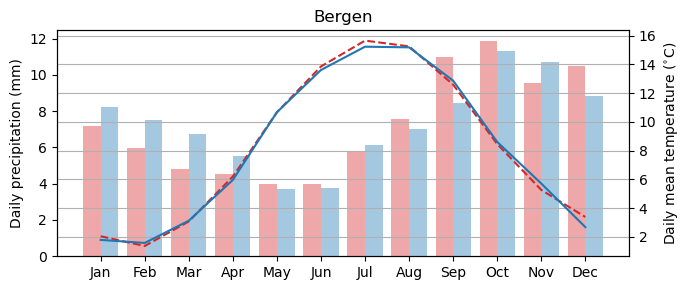

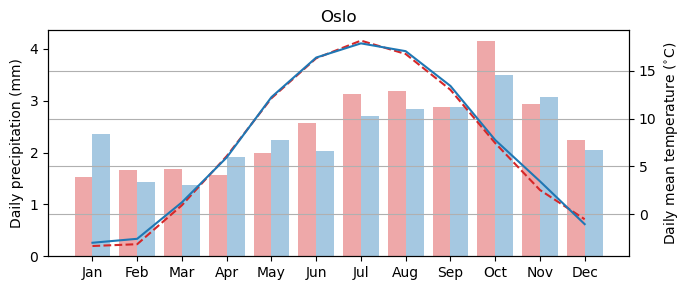

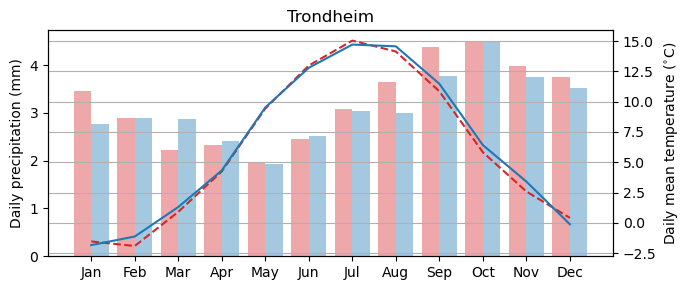

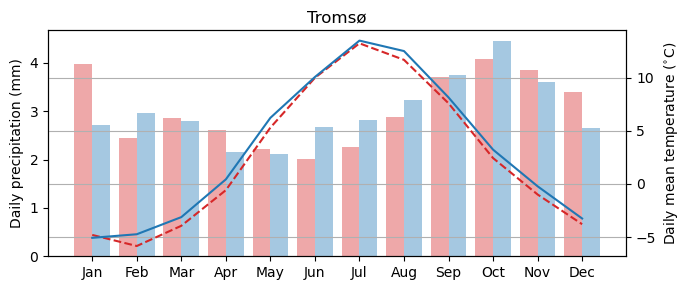

In [13]:
save_folder = '../figures/climatologies/' # Folder where climatologies should be saved
os.makedirs(save_folder, exist_ok=True) 

model_scenario_name = 'MRI-ESM2-0_ssp245' # Choose a model and SSP scenario
area_names = ['Bergen', 'Oslo', 'Trondheim', 'Tromsø'] # Choose an area

# Defines start and end of time slice by picking 20 years before and 20 years after abrupt SPG cooling

start_time1 = '2020-01-01'; end_time1 = '2039-12-31'
start_time2 = '2040-01-01'; end_time2 = '2059-12-31'


for area_name in area_names:

    temp = xr.open_dataarray('../city_data/'+model_scenario_name+'_'+area_name+'_temp.nc')
    precip = xr.open_dataarray('../city_data/'+model_scenario_name+'_'+area_name+'_precip.nc')
    # Divide time period into pre- and post cooling

    temp_pre_cooling = temp.sel(time=slice(start_time1, end_time1))
    temp_post_cooling = temp.sel(time=slice(start_time2, end_time2))
    pr_pre_cooling = precip.sel(time=slice(start_time1, end_time1))
    pr_post_cooling = precip.sel(time=slice(start_time2, end_time2))

    # Create climatology for both periods
    temp_pre_clim = temp_pre_cooling.groupby('time.month').mean('time')
    temp_post_clim = temp_post_cooling.groupby('time.month').mean('time')
    pr_pre_clim = pr_pre_cooling.groupby('time.month').mean('time')
    pr_post_clim = pr_post_cooling.groupby('time.month').mean('time')

    # Plot
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    fig, ax1 = plt.subplots(figsize=[7, 3])
    ax2 = ax1.twinx()
    ax1.bar(np.arange(1, 13, 1), pr_pre_clim, color='tab:red', alpha=0.4, width=0.4, label=str(start_time1.split('-')[0])+'-'+str(end_time1.split('-')[0]))
    ax1.bar(np.arange(1, 13, 1)+0.4, pr_post_clim, color='tab:blue', alpha=0.4, width = 0.4, label=str(start_time2.split('-')[0])+'-'+str(end_time2.split('-')[0]))
    ax1.set_ylabel('Daily precipitation (mm)')
    ax2.plot(np.arange(1, 13, 1)+0.2, temp_pre_clim-273.15, linestyle='--', color='tab:red')
    ax2.plot(np.arange(1, 13, 1)+0.2, temp_post_clim-273.15, linestyle='-', color='tab:blue')
    ax2.set_ylabel(r'Daily mean temperature ($^{\circ}$C)')
    plt.xticks(ticks=np.arange(1, 13, 1)+0.2, labels=months)
    plt.grid()
    plt.title(area_name)
    fig.tight_layout()
    fig.savefig(save_folder+model_scenario_name+'_'+area_name+'.png')
    plt.show()

    # Add legend
    box = ax1.get_position()
    ax1.set_position([box.x0, box.y0 + box.height * 0.1,
                    box.width, box.height * 0.85])
    ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
            ncol=2)

    fig.savefig(save_folder+model_scenario_name+'_'+area_name+'_label.png')

    plt.show()

## Compute extremes in climatology between major cities

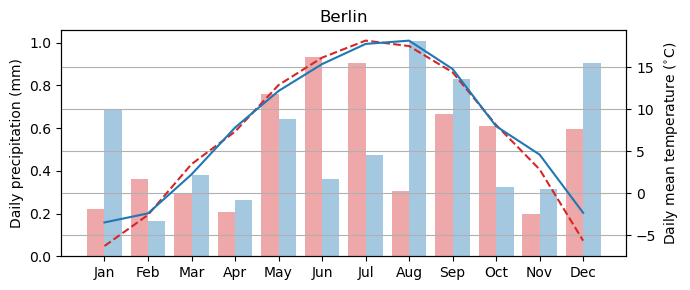

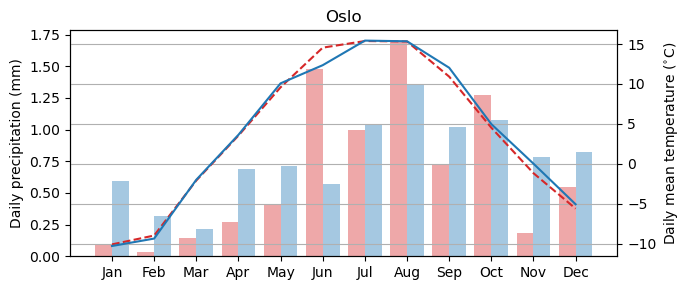

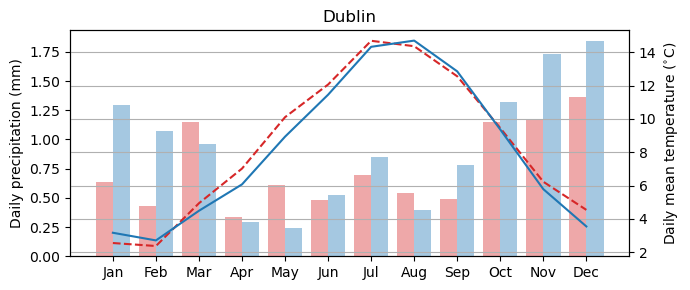

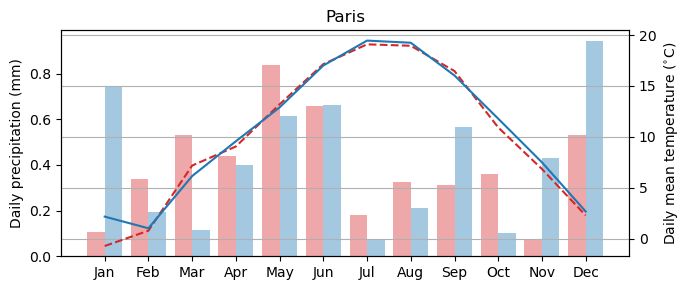

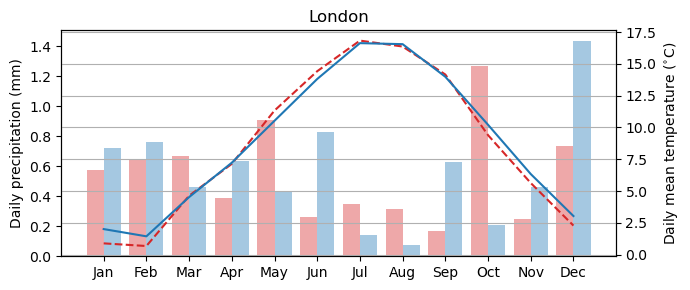

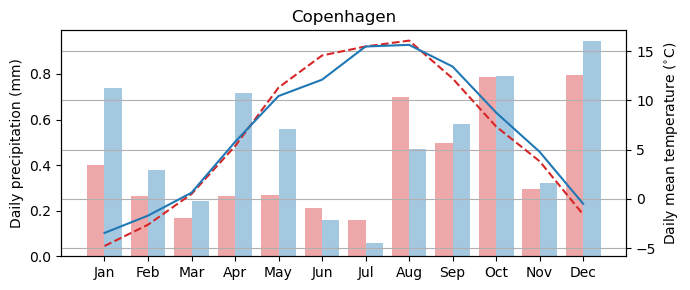

In [ ]:
save_folder = '../figures/climatologies/' # Folder where climatologies should be saved
os.makedirs(save_folder, exist_ok=True) 

model_scenario_name = 'MRI-ESM2-0_ssp245' # Choose a model and SSP scenario
area_names = ['Berlin', 'Oslo', 'Dublin', 'Paris', 'London', 'Copenhagen'] # Choose an area

# Defines start and end of time slice by picking 20 years before and 20 years after abrupt SPG cooling
if model_scenario_name == 'MRI-ESM2-0_ssp245':
    start_time = '2020-01-01'; end_time = '2059-12-31'
    cooling_year = '2040-01-01'
    time_array = np.arange(2020, 2060, 1)

elif model_scenario_name == 'NorESM2-LM_ssp245':
    start_time = '2015-01-01'; end_time = '2054-12-31'
    cooling_year = '2035-01-01'
    time_array = np.arange(2015, 2055, 1)

for area_name in area_names:

    temp = xr.open_dataarray('../city_data/'+model_scenario_name+'_'+area_name+'_temp.nc')
    precip = xr.open_dataarray('../city_data/'+model_scenario_name+'_'+area_name+'_precip.nc')
    # Divide time period into pre- and post cooling

    temp_pre_cooling = temp.sel(time=slice(start_time, cooling_year))
    temp_post_cooling = temp.sel(time=slice(cooling_year, end_time))
    pr_pre_cooling = precip.sel(time=slice(start_time, cooling_year))
    pr_post_cooling = precip.sel(time=slice(cooling_year, end_time))

    # Loop over each year to find the minimum month
    ds_temp_pre = temp_pre_cooling.isel(time=slice(0, 365)).groupby('time.month').mean('time')
    ds_temp_post = temp_post_cooling.isel(time=slice(0, 365)).groupby('time.month').mean('time')
    ds_pr_pre = pr_pre_cooling.isel(time=slice(0, 365)).groupby('time.month').mean('time')
    ds_pr_post = pr_post_cooling.isel(time=slice(0, 365)).groupby('time.month').mean('time')

    for year in range(1, 20):
        temp_pre = temp_pre_cooling.isel(time=slice(year*365, (year+1)*365)).groupby('time.month').mean('time')
        ds_temp_pre = xr.concat([ds_temp_pre, temp_pre], dim = 'year')
        temp_post = temp_post_cooling.isel(time=slice(year*365, (year+1)*365)).groupby('time.month').mean('time')
        ds_temp_post = xr.concat([ds_temp_post, temp_post], dim = 'year')
        pr_pre = pr_pre_cooling.isel(time=slice(year*365, (year+1)*365)).groupby('time.month').mean('time')
        ds_pr_pre = xr.concat([ds_pr_pre, pr_pre], dim = 'year')
        pr_post = pr_post_cooling.isel(time=slice(year*365, (year+1)*365)).groupby('time.month').mean('time')
        ds_pr_post = xr.concat([ds_pr_post, pr_post], dim = 'year')

    temp_pre_min = ds_temp_pre.min('year')
    temp_post_min = ds_temp_post.min('year')
    pr_pre_min = ds_pr_pre.min('year')
    pr_post_min = ds_pr_post.min('year')

    # Plot
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    fig, ax1 = plt.subplots(figsize=[7, 3])
    ax2 = ax1.twinx()
    ax1.bar(np.arange(1, 13, 1), pr_pre_min, color='tab:red', alpha=0.4, width=0.4, label=str(time_array[0])+'-'+str(time_array[0]+20))
    ax1.bar(np.arange(1, 13, 1)+0.4, pr_post_min, color='tab:blue', alpha=0.4, width = 0.4, label=str(time_array[0]+20)+'-'+str(time_array[-1]))
    ax1.set_ylabel('Daily precipitation (mm)')
    ax2.plot(np.arange(1, 13, 1)+0.2, temp_pre_min-273.15, linestyle='--', color='tab:red')
    ax2.plot(np.arange(1, 13, 1)+0.2, temp_post_min-273.15, linestyle='-', color='tab:blue')
    ax2.set_ylabel(r'Daily mean temperature ($^{\circ}$C)')
    plt.xticks(ticks=np.arange(1, 13, 1)+0.2, labels=months)
    plt.grid()
    plt.title(area_name)
    fig.tight_layout()
    fig.savefig(save_folder+'min_'+model_scenario_name+'_'+area_name+'.png')
    plt.show()

    # Add legend
    box = ax1.get_position()
    ax1.set_position([box.x0, box.y0 + box.height * 0.1,
                    box.width, box.height * 0.85])
    ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
            ncol=2)

    fig.savefig(save_folder+'min_'+model_scenario_name+'_'+area_name+'_label.png')

    plt.show()

## Compute variance 

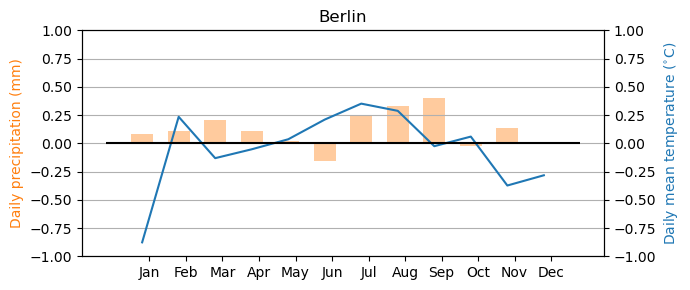

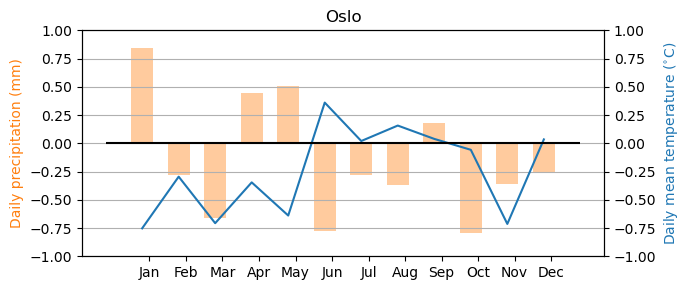

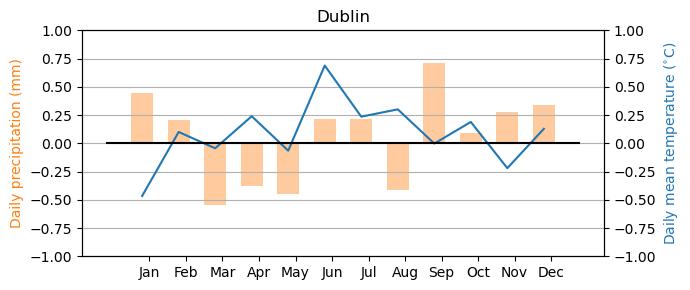

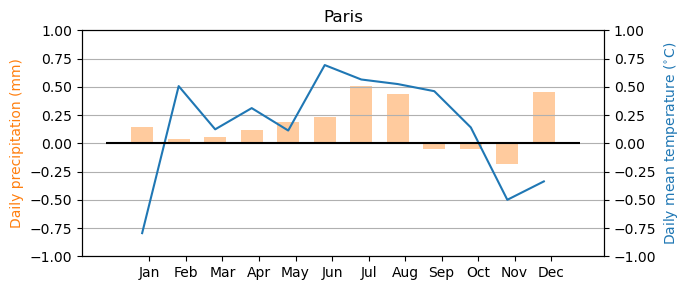

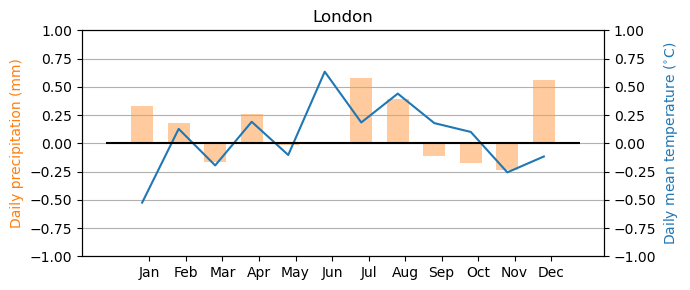

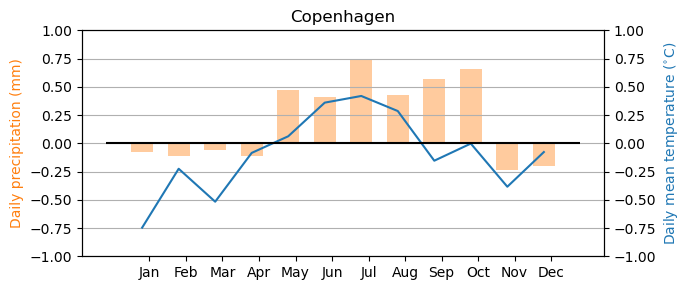

In [5]:
save_folder = '../figures/climatologies_diff/' # Folder where climatologies should be saved
os.makedirs(save_folder, exist_ok=True) 

model_scenario_name = 'MRI-ESM2-0_ssp245' # Choose a model and SSP scenario
area_names = ['Berlin', 'Oslo', 'Dublin', 'Paris', 'London', 'Copenhagen'] # Choose an area

# Defines start and end of time slice by picking 20 years before and 20 years after abrupt SPG cooling
if model_scenario_name == 'MRI-ESM2-0_ssp245':
    start_time = '2020-01-01'; end_time = '2059-12-31'
    cooling_year = '2040-01-01'
    time_array = np.arange(2020, 2060, 1)

elif model_scenario_name == 'NorESM2-LM_ssp245':
    start_time = '2015-01-01'; end_time = '2054-12-31'
    cooling_year = '2035-01-01'
    time_array = np.arange(2015, 2055, 1)

for area_name in area_names:

    temp = xr.open_dataarray('../city_data/'+model_scenario_name+'_'+area_name+'_temp.nc')
    precip = xr.open_dataarray('../city_data/'+model_scenario_name+'_'+area_name+'_precip.nc')
    # Divide time period into pre- and post cooling

    temp_pre_cooling = temp.sel(time=slice(start_time, cooling_year))
    temp_post_cooling = temp.sel(time=slice(cooling_year, end_time))
    pr_pre_cooling = precip.sel(time=slice(start_time, cooling_year))
    pr_post_cooling = precip.sel(time=slice(cooling_year, end_time))

    # Create climatology for both periods
    temp_pre_clim = temp_pre_cooling.groupby('time.month').std('time')
    temp_post_clim = temp_post_cooling.groupby('time.month').std('time')
    pr_pre_clim = pr_pre_cooling.groupby('time.month').std('time')
    pr_post_clim = pr_post_cooling.groupby('time.month').std('time')

    # Plot
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    fig, ax1 = plt.subplots(figsize=[7, 3])
    ax2 = ax1.twinx()
    #ax1.bar(np.arange(1, 13, 1), pr_pre_clim, color='tab:red', alpha=0.4, width=0.4, label=str(time_array[0])+'-'str(time_array[0]+20))
    #ax1.bar(np.arange(1, 13, 1)+0.4, pr_post_clim, color='tab:blue', alpha=0.4, width = 0.4, label=str(time_array[0]+20)+'-'str(time_array[-1]))
    ax1.bar(np.arange(1, 13, 1), pr_post_clim-pr_pre_clim, alpha=0.4, width=0.6, color='tab:orange')
    ax1.set_ylabel('Daily precipitation (mm)', color='tab:orange')
    ax1.set_ylim([-1,1])
    #ax2.plot(np.arange(1, 13, 1)+0.2, temp_pre_clim-273.15, linestyle='--', color='tab:red')
    #ax2.plot(np.arange(1, 13, 1)+0.2, temp_post_clim-273.15, linestyle='-', color='tab:blue')
    ax2.plot(np.arange(1, 13, 1), temp_post_clim - temp_pre_clim, color='tab:blue')
    ax2.set_ylabel(r'Daily mean temperature ($^{\circ}$C)', color='tab:blue')
    ax2.set_ylim([-1,1])
    ax2.hlines(0, 0, 13, color='black')
    plt.xticks(ticks=np.arange(1, 13, 1)+0.2, labels=months)
    plt.grid(axis='both')
    plt.title(area_name)
    fig.tight_layout()
    fig.savefig(save_folder+'std_'+model_scenario_name+'_'+area_name+'.png')

    plt.show()

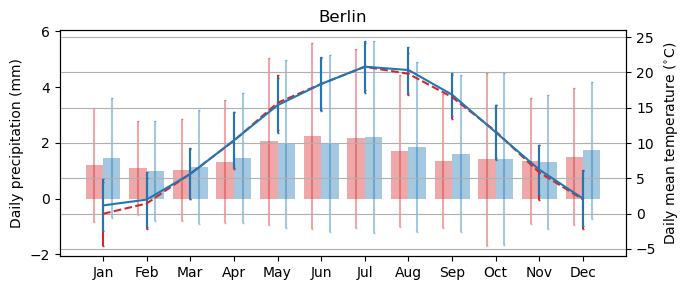

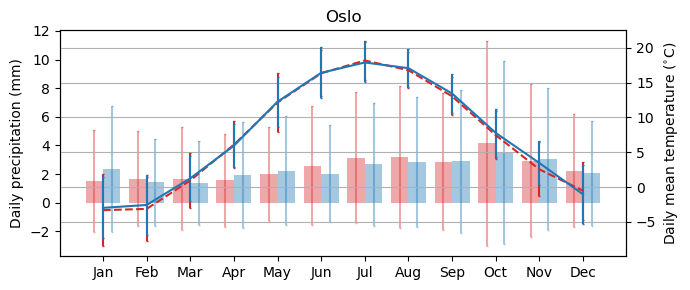

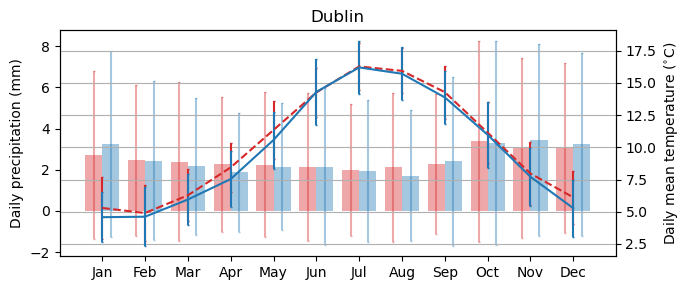

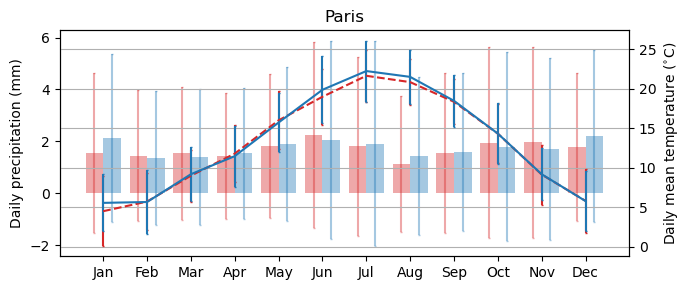

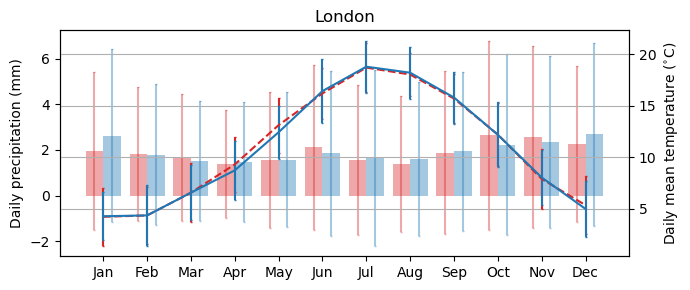

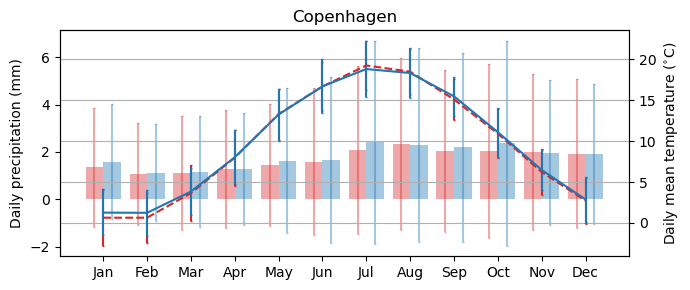

In [26]:
save_folder = '../figures/climatologies/std/' # Folder where climatologies should be saved
os.makedirs(save_folder, exist_ok=True) 

model_scenario_name = 'MRI-ESM2-0_ssp245' # Choose a model and SSP scenario
area_names = ['Berlin', 'Oslo', 'Dublin', 'Paris', 'London', 'Copenhagen'] # Choose an area


# Defines start and end of time slice by picking 20 years before and 20 years after abrupt SPG cooling
if model_scenario_name == 'MRI-ESM2-0_ssp245':
    start_time = '2020-01-01'; end_time = '2059-12-31'
    cooling_year = '2040-01-01'
    time_array = np.arange(2020, 2060, 1)

elif model_scenario_name == 'NorESM2-LM_ssp245':
    start_time = '2015-01-01'; end_time = '2054-12-31'
    cooling_year = '2035-01-01'
    time_array = np.arange(2015, 2055, 1)

for area_name in area_names:

    temp = xr.open_dataarray('../city_data/'+model_scenario_name+'_'+area_name+'_temp.nc')
    precip = xr.open_dataarray('../city_data/'+model_scenario_name+'_'+area_name+'_precip.nc')
    # Divide time period into pre- and post cooling

    temp_pre_cooling = temp.sel(time=slice(start_time, cooling_year))
    temp_post_cooling = temp.sel(time=slice(cooling_year, end_time))
    pr_pre_cooling = precip.sel(time=slice(start_time, cooling_year))
    pr_post_cooling = precip.sel(time=slice(cooling_year, end_time))

    # Create climatology for both periods
    temp_pre_clim = temp_pre_cooling.groupby('time.month').mean('time')
    temp_post_clim = temp_post_cooling.groupby('time.month').mean('time')
    pr_pre_clim = pr_pre_cooling.groupby('time.month').mean('time')
    pr_post_clim = pr_post_cooling.groupby('time.month').mean('time')

    temp_pre_std = temp_pre_cooling.groupby('time.month').std('time')
    temp_post_std = temp_post_cooling.groupby('time.month').std('time')
    pr_pre_std = pr_pre_cooling.groupby('time.month').std('time')
    pr_post_std = pr_post_cooling.groupby('time.month').std('time')

    # Plot
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    fig, ax1 = plt.subplots(figsize=[7, 3])
    ax2 = ax1.twinx()
    ax1.bar(np.arange(1, 13, 1), pr_pre_clim, color='tab:red', alpha=0.4, width=0.4, label=str(time_array[0])+'-'+str(time_array[0]+20))
    ax1.bar(np.arange(1, 13, 1)+0.4, pr_post_clim, color='tab:blue', alpha=0.4, width = 0.4, label=str(time_array[0]+20)+'-'+str(time_array[-1]))
    ax1.errorbar(np.arange(1, 13, 1), pr_pre_clim, yerr=pr_pre_std, capsize=0.5, linestyle=' ', color='tab:red', alpha=0.4)

    ax1.errorbar(np.arange(1, 13, 1)+0.4, pr_post_clim, yerr=pr_post_std, capsize=0.5, linestyle=' ', color='tab:blue', alpha=0.4)

    ax1.set_ylabel('Daily precipitation (mm)')
    #ax2.plot(np.arange(1, 13, 1)+0.2, temp_pre_clim-273.15, linestyle='--', color='tab:red')
    ax2.errorbar(np.arange(1, 13, 1)+0.2, temp_pre_clim-273.15, yerr=temp_pre_std, capsize=0.5, linestyle='--', color='tab:red')
    #ax2.plot(np.arange(1, 13, 1)+0.2, temp_post_clim-273.15, linestyle='-', color='tab:blue')
    ax2.errorbar(np.arange(1, 13, 1)+0.2, temp_post_clim-273.15, yerr=temp_post_std, capsize=0.5, linestyle='-', color='tab:blue')
    ax2.set_ylabel(r'Daily mean temperature ($^{\circ}$C)')
    plt.xticks(ticks=np.arange(1, 13, 1)+0.2, labels=months)
    plt.grid()
    plt.title(area_name)
    fig.tight_layout()
    fig.savefig(save_folder+model_scenario_name+'_'+area_name+'.png')
    plt.show()

    # Add legend
    box = ax1.get_position()
    ax1.set_position([box.x0, box.y0 + box.height * 0.1,
                    box.width, box.height * 0.85])
    ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
            ncol=2)

    fig.savefig(save_folder+'std_'+model_scenario_name+'_'+area_name+'_label.png')

    plt.show()